# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('amazon_alexa.tsv',delimiter='\t')

In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
data.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 86.2+ KB


In [6]:
positive=data[data['feedback']==1]
negative=data[data['feedback']==0]

In [7]:
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


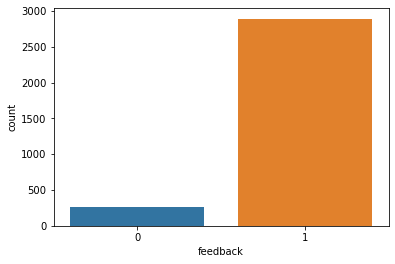

In [8]:
sns.countplot(x='feedback',data=data)

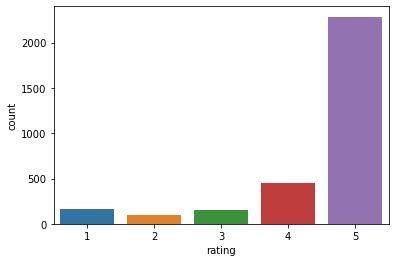

In [9]:
sns.countplot(x='rating',data=data)

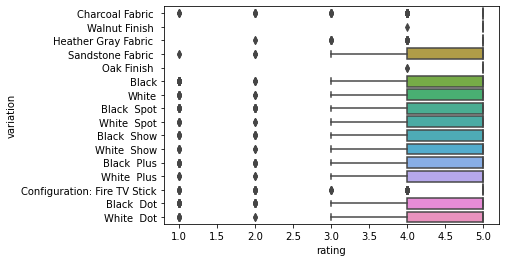

In [12]:
sns.boxplot(x='rating',y='variation',data=data)

# Data Cleaning and Training

In [13]:
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [14]:
data=data.drop(['date'],axis=1)

In [15]:
data

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1
...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1


In [16]:
variation_dummies=pd.get_dummies(data['variation'],drop_first=True)

In [17]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [19]:
data.drop(['variation'],axis=1,inplace=True)

In [20]:
data

,rating,verified_reviews,feedback
0,5,Love my Echo!,1
1,5,Loved it!,1
2,4,"Sometimes while playing a game, you can answer...",1
3,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,Music,1
...,...,...,...
3145,5,"Perfect for kids, adults and everyone in betwe...",1
3146,5,"Listening to music, searching locations, check...",1
3147,5,"I do love these things, i have them running my...",1
3148,5,Only complaint I have is that the sound qualit...,1


In [21]:
data=pd.concat([data,variation_dummies],axis=1)

In [22]:
data

,rating,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,5,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,5,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,5,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,5,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
vectorizer=CountVectorizer()

In [25]:
data_countvectorizer=vectorizer.fit_transform(data['verified_reviews'])

In [27]:
data_countvectorizer.shape

(3150, 4044)

In [28]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [29]:
print(data_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
data.drop(['verified_reviews'],axis=1,inplace=True)

In [32]:
data

,rating,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [33]:
encoded_reviews=pd.DataFrame(data_countvectorizer.toarray())

In [34]:
data=pd.concat([data,encoded_reviews],axis=1)

In [35]:
data

,rating,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
"""All the numbers in column names refer to a word in the reviews given,based on that whether it is present in that particular   review or not it is showing 0 or 1""" 

'All the numbers in column names refer to a word in the reviews given,based on that whether it is present in that particular   review or not it is showing 0 or 1'

In [43]:
x=data.drop(['feedback'],axis=1)

In [44]:
y=data['feedback']

In [45]:
x

,rating,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=5)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [64]:
random_classifier=RandomForestClassifier(n_estimators=60,criterion='entropy')

In [65]:
random_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=60)

In [66]:
y_pred= random_classifier.predict(x_train)
cm=confusion_matrix(y_train,y_pred)

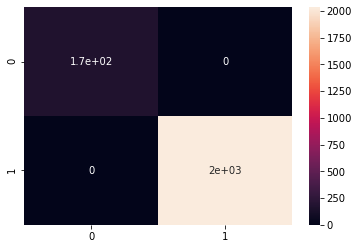

In [67]:
sns.heatmap(cm,annot=True)

In [68]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00      2034

    accuracy                           1.00      2205
   macro avg       1.00      1.00      1.00      2205
weighted avg       1.00      1.00      1.00      2205



In [71]:
y_pred_test=random_classifier.predict(x_test)

In [72]:
cm=confusion_matrix(y_test,y_pred_test)

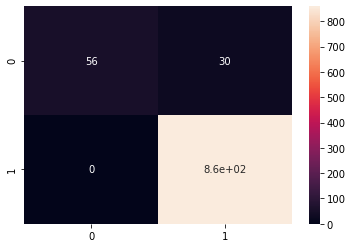

In [73]:
sns.heatmap(cm,annot=True)

In [74]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        86
           1       0.97      1.00      0.98       859

    accuracy                           0.97       945
   macro avg       0.98      0.83      0.89       945
weighted avg       0.97      0.97      0.97       945

